<a href="https://colab.research.google.com/github/rishav2404/Data-Analysis/blob/main/Feature_Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Binning**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [20]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [25]:
df.Age.min()

18

In [26]:
df.Age.max()

92

In [29]:
labels = ['0-20', '21-40', '41-60', 'Above 61']
# bins = [0, 21, 41, 61, 100] # contains first number from each group
bins = [0, 20, 40, 60, 100] # contains first number from each group

df['Age_Bins'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [30]:
df.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,41-60


In [37]:
df[['Age','Age_Bins']]
# df[['Age','Age_Bins']].to_csv('test.csv') # get a csv file

,Age,Age_Bins
0,42,41-60
1,41,41-60
2,42,41-60
3,39,21-40
4,43,41-60
...,...,...
9995,39,21-40
9996,35,21-40
9997,36,21-40
9998,42,41-60


In [39]:
df.Age_Bins.value_counts()

,count
Age_Bins,
21-40,6330
41-60,3117
Above 61,464
0-20,89


Text(0, 0.5, 'Age Count')

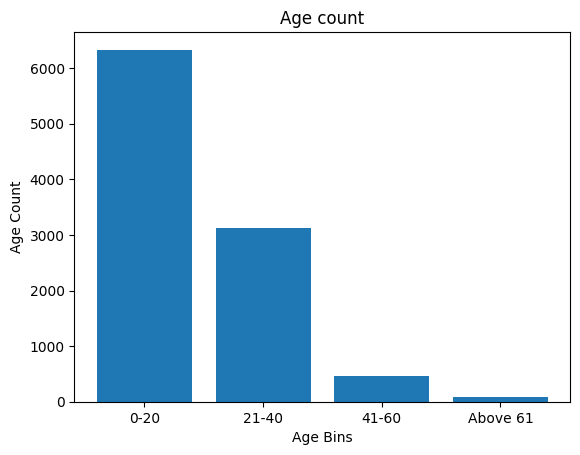

In [48]:
# making the bar chart on data
plt.bar(labels, df.Age_Bins.value_counts())

plt.title('Age count')

plt.xlabel('Age Bins')
plt.ylabel('Age Count')
# plt.show()

In [52]:
def add_lables(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i],ha='center')


<ipython-input-52-8f2086180ab0>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i,y[i],y[i],ha='center')


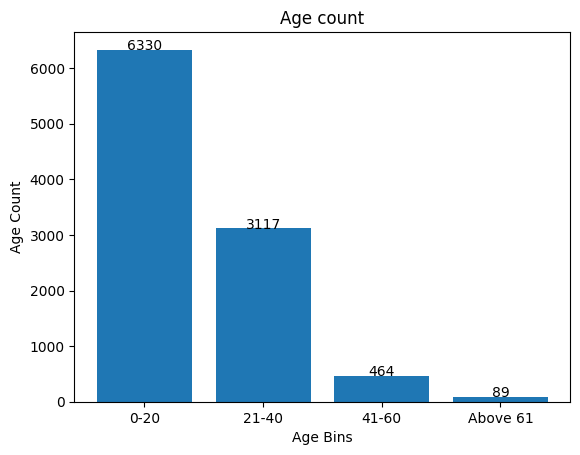

In [53]:
plt.bar(labels, df.Age_Bins.value_counts())

add_lables(labels, df.Age_Bins.value_counts())

plt.title('Age count')
plt.xlabel('Age Bins')
plt.ylabel('Age Count')
plt.show()